#### Import libraries

In [1]:
import pandas as pd ### Library for handling dataframes
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind ### Library for performing unpaired t-test
import statsmodels.api as sm ### Library for running linear regressions
from statsmodels.stats.outliers_influence import variance_inflation_factor ### VIF package
from statsmodels.stats.diagnostic import het_breuschpagan ### Heteroscedasticity  package
from statsmodels.compat import lzip ### For better visualazitn breusch-pagan results

/srv/app/venv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Read Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,price,dist,bathrooms,garages,area,SES,popdens,perc_com,apt
0,40000,0.69,1,1,58,3,462.56,0.0,1
1,40000,0.69,1,1,58,3,462.56,0.0,1
2,57900,0.68,2,1,73,3,461.99,0.0,1
3,65000,0.92,2,0,120,3,436.21,0.0,0
4,140000,0.69,3,1,375,3,462.56,0.0,0


#### Perform mulitvariate linear regression

###### Regression with controls

In [4]:
y = data['price'] ### define dependent variable
x = data[['dist', 'bathrooms', 'garages', 'area', 'SES', 'popdens', 'perc_com']].assign(Intercept = 1) ### define independent variables - and include intercept

sm.OLS(y, x).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.549     
Dependent Variable:   price             AIC:                 70334.6885
Date:                 2020-02-11 15:53  BIC:                 70382.5451
No. Observations:     2928              Log-Likelihood:      -35159.   
Df Model:             7                 F-statistic:         510.8     
Df Residuals:         2920              Prob (F-statistic):  0.00      
R-squared:            0.550             Scale:               1.5802e+09
-----------------------------------------------------------------------
             Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
dist         933.7241  388.2226   2.4051 0.0162    172.5063   1694.9419
bathrooms  13647.0590 1021.7015  13.3572 0.0000  11643.7304  15650.3876
garages    13207.9686 1203.5132  10.9745 0.0000  10848.1480  15567.7892
area         283.6504   12.5247  22.6472 0.0000    259.0922    308.2086
SES        26767.8617 1181.5197  22.6555 0.0000  24451.1653  29084.5581
popdens        3.7981    3.8012   0.9992 0.3178     -3.6552     11.2513
perc_com   -2433.2817 3007.0532  -0.8092 0.4185  -8329.4417   3462.8782
Intercept -82406.3586 4139.3676 -19.9080 0.0000 -90522.7343 -74289.9830
-----------------------------------------------------------------------
Omnibus:              3184.650       Durbin-Watson:          1.298     
Prob(Omnibus):        0.000          Jarque-Bera (JB):       376829.526
Skew:                 5.299          Prob(JB):               0.000     
Kurtosis:             57.557         Condition No.:          2868      
=======================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

###### Regression with controls + dummy variable

In [5]:
y = data['price'] ### define dependent variable
x = data[['dist', 'bathrooms', 'garages', 'area', 'SES', 'popdens', 'perc_com', 'apt']].assign(Intercept = 1) ### define independent variables - and include intercept

sm.OLS(y, x).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.550     
Dependent Variable:   price             AIC:                 70334.3568
Date:                 2020-02-11 15:54  BIC:                 70388.1955
No. Observations:     2928              Log-Likelihood:      -35158.   
Df Model:             8                 F-statistic:         447.4     
Df Residuals:         2919              Prob (F-statistic):  0.00      
R-squared:            0.551             Scale:               1.5795e+09
-----------------------------------------------------------------------
             Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
dist         991.1277  389.9557   2.5416 0.0111    226.5115   1755.7438
bathrooms  13320.8809 1043.6250  12.7640 0.0000  11274.5650  15367.1967
garages    13098.3672 1205.3848  10.8665 0.0000  10734.8763  15461.8581
area         271.1783   14.9563  18.1313 0.0000    241.8522    300.5043
SES        27264.4059 1225.3098  22.2510 0.0000  24861.8467  29666.9652
popdens        3.8073    3.8003   1.0018 0.3165     -3.6443     11.2588
perc_com   -2371.9284 3006.6402  -0.7889 0.4302  -8267.2794   3523.4226
apt        -3433.3813 2251.5180  -1.5249 0.1274  -7848.1060    981.3435
Intercept -79787.1794 4480.7024 -17.8068 0.0000 -88572.8376 -71001.5212
-----------------------------------------------------------------------
Omnibus:              3197.807       Durbin-Watson:          1.296     
Prob(Omnibus):        0.000          Jarque-Bera (JB):       383165.969
Skew:                 5.334          Prob(JB):               0.000     
Kurtosis:             58.017         Condition No.:          3131      
=======================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

###### New variable - non-linear!

Lets include a new variable where:
$area2 = area^2$

In [6]:
data['area2'] = data['area']*data['area']

In [7]:
data.head(3)

,price,dist,bathrooms,garages,area,SES,popdens,perc_com,apt,area2
0,40000,0.69,1,1,58,3,462.56,0.0,1,3364
1,40000,0.69,1,1,58,3,462.56,0.0,1,3364
2,57900,0.68,2,1,73,3,461.99,0.0,1,5329


Let's run the model again, with this new variable

In [8]:
y = data['price'] ### define dependent variable
x = data[['dist', 'bathrooms', 'garages', 'area', 'SES', 'popdens', 'perc_com', 'apt', 'area2']].assign(Intercept = 1) ### define independent variables - and include intercept

model = sm.OLS(y, x).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      0.556     
Dependent Variable:    price             AIC:                 70292.3552
Date:                  2020-02-11 15:54  BIC:                 70352.1760
No. Observations:      2928              Log-Likelihood:      -35136.   
Df Model:              9                 F-statistic:         408.5     
Df Residuals:          2918              Prob (F-statistic):  0.00      
R-squared:             0.558             Scale:               1.5564e+09
------------------------------------------------------------------------
             Coef.     Std.Err.    t     P>|t|     [0.025       0.975]  
------------------------------------------------------------------------
dist        1190.2005  388.2597   3.0655 0.0022     428.9097   1951.4914
bathrooms  11994.1924 1055.0415  11.3685 0.0000    9925.4909  14062.8938
garages    11882.9768 1210.4565   9.8169 0.0000    9509.5411  14256.4125
area         583.5524   49.2843  11.8405 0.0000     486.9168    680.1879
SES        25133.3930 1257.8872  19.9806 0.0000   22666.9563  27599.8296
popdens        2.9898    3.7745   0.7921 0.4284      -4.4111     10.3908
perc_com   -2705.8058 2985.0671  -0.9064 0.3648   -8558.8576   3147.2460
apt         4544.6396 2536.9318   1.7914 0.0733    -429.7186   9518.9978
area2         -0.7406    0.1114  -6.6470 0.0000      -0.9591     -0.5221
Intercept -94766.8875 4986.2576 -19.0056 0.0000 -104543.8282 -84989.9468
------------------------------------------------------------------------
Omnibus:               3205.638       Durbin-Watson:          1.275     
Prob(Omnibus):         0.000          Jarque-Bera (JB):       382118.510
Skew:                  5.360          Prob(JB):               0.000     
Kurtosis:              57.929         Condition No.:          238187    
========================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

#### Let's introduce some collinearity analysis

In [9]:
data.corr()

,price,dist,bathrooms,garages,area,SES,popdens,perc_com,apt,area2
price,1.000000,0.071014,0.549798,0.451800,0.601722,0.447644,-0.001044,0.012168,-0.385897,0.521075
dist,0.071014,1.000000,-0.040656,-0.052897,-0.082576,0.284161,-0.036284,0.105044,0.186716,-0.056968
bathrooms,0.549798,-0.040656,1.000000,0.345714,0.619691,0.175786,0.015468,-0.014092,-0.525073,0.529654
garages,0.451800,-0.052897,0.345714,1.000000,0.384379,0.270412,-0.020816,-0.000385,-0.279929,0.310064
area,0.601722,-0.082576,0.619691,0.384379,1.000000,0.137786,0.029268,-0.023644,-0.688590,0.959223
SES,0.447644,0.284161,0.175786,0.270412,0.137786,1.000000,-0.073019,0.096774,0.101966,0.091597
popdens,-0.001044,-0.036284,0.015468,-0.020816,0.029268,-0.073019,1.000000,0.060767,-0.034779,0.023738
perc_com,0.012168,0.105044,-0.014092,-0.000385,-0.023644,0.096774,0.060767,1.000000,0.052753,-0.025784
apt,-0.385897,0.186716,-0.525073,-0.279929,-0.688590,0.101966,-0.034779,0.052753,1.000000,-0.568770
area2,0.521075,-0.056968,0.529654,0.310064,0.959223,0.091597,0.023738,-0.025784,-0.568770,1.000000


###### Variance inflation factor

Let's compute!

In [10]:
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])] #have to include intercept
vif

[1.1419014504835092,
 1.810390063655256,
 1.3111109877335707,
 27.108377580159125,
 1.4032784076988059,
 1.0136495582032874,
 1.022679015266867,
 2.8175599186644393,
 18.66988146339792,
 46.77230851552062]

Let's include the columns to better understand what is going on

In [11]:
pd.Series(vif, index=x.columns)

dist          1.141901
bathrooms     1.810390
garages       1.311111
area         27.108378
SES           1.403278
popdens       1.013650
perc_com      1.022679
apt           2.817560
area2        18.669881
Intercept    46.772309
dtype: float64

#### Let's do some Heterocedasticity analysis!

###### Plot residuals vs observed & fitted data

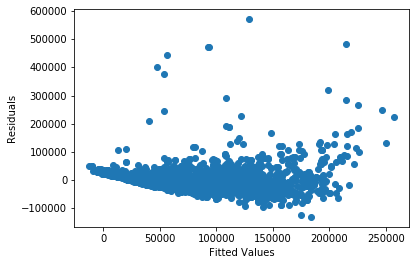

In [13]:
residuals = model.resid
prediction = model.predict()

plt.scatter(prediction, residuals)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values');

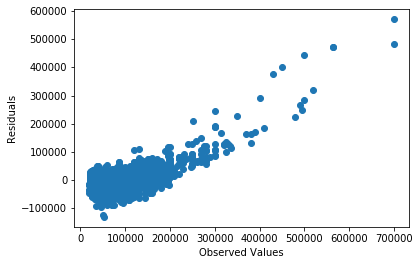

In [14]:
residuals = model.resid
observed = data['price']

plt.scatter(observed, residuals)
plt.ylabel('Residuals')
plt.xlabel('Observed Values');

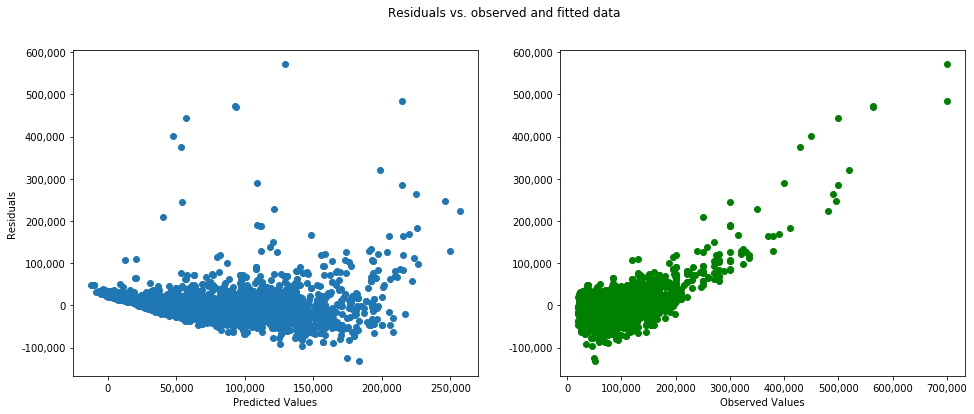

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

residuals = model.resid
prediction = model.predict()
observed = data['price']

### Figure 1
x1 = prediction
y1 = residuals
### Figure 2
x2 = observed
y2 = residuals

### Creates title for overall figure
plt.suptitle('Residuals vs. observed and fitted data')

### Creates first plot
ax1.scatter(x1, y1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
### Formats axis number to include thousands separator
ax1.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x1, loc: "{:,}".format(int(x1))))
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y1, loc: "{:,}".format(int(y1))))

### Creates second plot
ax2.scatter(x2, y2, c ='green') ### We can change the color and marker type
ax2.set_xlabel('Observed Values')

### Formats axis number to include thousands separator
ax2.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x1, loc: "{:,}".format(int(x1))))
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y1, loc: "{:,}".format(int(y1))))

# ax2.tick_params(axis='x', labelrotation=35) ### Let's rotate the labels!

plt.show()